In [1]:
#imports
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import scipy.stats as st
import quandl
from quandl_apitoken import api_key
import seaborn as sn

Quandl API Pulls and write to CSV

In [2]:
#quandl api pulls
#silver, coal, crude
try:
    si_download = quandl.get("CHRIS/MCX_SI2", authtoken=api_key)
    alum_download = quandl.get("CHRIS/CME_ALI2", authtoken=api_key)
    coal_download = quandl.get("CHRIS/CME_QL2", authtoken=api_key)
    crude_download = quandl.get("CHRIS/CME_CL2", authtoken=api_key)
    ng_download = quandl.get("CHRIS/MCX_NG2", authtoken=api_key)
    copper_download = quandl.get("CHRIS/CME_HG2", authtoken=api_key)
    gold_download = quandl.get("CHRIS/CME_GC2", authtoken=api_key)
    ctn_download = quandl.get("CHRIS/ICE_CT2", authtoken=api_key)
    lnh_download = quandl.get("CHRIS/CME_LN2", authtoken=api_key)
    SP500_download = quandl.get("CHRIS/CME_ES2", authtoken=api_key)
    corn_download = quandl.get("CHRIS/CME_C2", authtoken=api_key)
    soyb_download = quandl.get("CHRIS/CME_S1", authtoken=api_key)  
    
           
    si_download.to_csv("si_2nd.csv")
    alum_download.to_csv("alum_2nd.csv")
    coal_download.to_csv("coal_2nd.csv")
    crude_download.to_csv("crude_2nd.csv")
    ng_download.to_csv("ng_2nd.csv")
    copper_download.to_csv("copper_2nd.csv")
    gold_download.to_csv("gold_2nd.csv")
    ctn_download.to_csv("ctn_2nd.csv")
    lnh_download.to_csv("lnh_2nd.csv")
    corn_download.to_csv("corn_2nd.csv")
    soyb_download.to_csv("soyb_2nd.csv")
    SP500_download.to_csv("SP500_2nd.csv")
    
    

except Exception as e:
    print(e)

In [2]:
#convert to csv for df
csv_file_si = os.path.join("si_2nd.csv")
csv_file_alum = os.path.join("alum_2nd.csv")
csv_file_coal = os.path.join("coal_2nd.csv")
csv_file_crude = os.path.join("crude_2nd.csv")
csv_file_ng = os.path.join("ng_2nd.csv")
csv_file_copper = os.path.join("copper_2nd.csv")
csv_file_gold = os.path.join("gold_2nd.csv")
csv_file_ctn = os.path.join("ctn_2nd.csv")
csv_file_lnh = os.path.join("lnh_2nd.csv")
csv_file_corn = os.path.join("corn_2nd.csv")
csv_file_soyb = os.path.join("soyb_2nd.csv")
csv_file_sp500 = os.path.join("SP500_2nd.csv")


si_raw_df = pd.read_csv(csv_file_si)
alum_raw_df = pd.read_csv(csv_file_alum)
coal_raw_df = pd.read_csv(csv_file_coal)
crude_raw_df = pd.read_csv(csv_file_crude)
ng_raw_df = pd.read_csv(csv_file_ng)
copper_raw_df = pd.read_csv(csv_file_copper)
gold_raw_df = pd.read_csv(csv_file_gold)
ctn_raw_df = pd.read_csv(csv_file_ctn)
lnh_raw_df = pd.read_csv(csv_file_lnh)
corn_raw_df = pd.read_csv(csv_file_corn)
soyb_raw_df = pd.read_csv(csv_file_soyb)
sp500_raw_df = pd.read_csv(csv_file_sp500)
copper_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1959-10-29,0.3240,0.3240,0.3190,0.3240,NaN,0.3240,79.0,582.0
1,1959-10-30,0.3215,0.3278,0.3210,0.3215,NaN,0.3215,100.0,592.0
2,1959-11-02,0.3230,0.3230,0.3180,0.3230,NaN,0.3230,88.0,587.0
3,1959-11-04,0.3300,0.3307,0.3259,0.3300,NaN,0.3300,135.0,577.0
4,1959-11-05,0.3310,0.3340,0.3310,0.3310,NaN,0.3310,161.0,617.0


In [3]:
si_raw_df.dropna()
alum_raw_df.dropna()
coal_raw_df.dropna()
crude_raw_df.dropna()
ng_raw_df.dropna()
copper_raw_df.dropna()
gold_raw_df.dropna()
ctn_raw_df.dropna()
lnh_raw_df.dropna()
corn_raw_df.dropna()
soyb_raw_df.dropna()
sp500_raw_df.dropna()


,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
4200,2014-02-18,1827.25,1833.25,1824.50,1830.50,2.50,1830.50,5488.0,68130.0
4201,2014-02-19,1830.75,1837.50,1816.75,1819.25,12.00,1818.50,7246.0,69794.0
4202,2014-02-20,1820.75,1833.25,1810.50,1828.75,10.75,1829.25,8650.0,72426.0
4203,2014-02-21,1829.00,1836.75,1826.00,1827.25,2.00,1827.25,7681.0,75854.0
4204,2014-02-24,1828.25,1849.50,1822.50,1837.25,11.75,1839.00,6691.0,77576.0
...,...,...,...,...,...,...,...,...,...
5812,2020-07-13,3171.75,3215.00,3130.00,3137.75,30.00,3137.50,1450.0,47598.0
5813,2020-07-14,3144.00,3180.75,3108.50,3173.00,35.25,3172.75,2675.0,47636.0
5814,2020-07-15,3199.00,3222.00,3180.00,3211.00,35.75,3208.50,1863.0,48078.0
5815,2020-07-16,3212.50,3217.00,3178.00,3185.75,-25.00,3183.50,929.0,48166.0


In [4]:
si_raw_df["Date"] = pd.to_datetime(si_raw_df["Date"])
alum_raw_df["Date"] = pd.to_datetime(alum_raw_df["Date"])
coal_raw_df["Date"] = pd.to_datetime(coal_raw_df["Date"])
crude_raw_df["Date"] = pd.to_datetime(crude_raw_df["Date"])
ng_raw_df["Date"] = pd.to_datetime(ng_raw_df["Date"])
copper_raw_df["Date"] = pd.to_datetime(copper_raw_df["Date"])
gold_raw_df["Date"] = pd.to_datetime(gold_raw_df["Date"])
ctn_raw_df["Date"] = pd.to_datetime(ctn_raw_df["Date"])
lnh_raw_df["Date"] = pd.to_datetime(lnh_raw_df["Date"])
corn_raw_df["Date"] = pd.to_datetime(corn_raw_df["Date"])
soyb_raw_df["Date"] = pd.to_datetime(soyb_raw_df["Date"])
sp500_raw_df["Date"] = pd.to_datetime(sp500_raw_df["Date"])


In [5]:
sp500_raw_df.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,1997-09-09,943.50,951.00,941.50,944.00,NaN,944.00,896.0,273.0
1,1997-09-10,942.75,943.25,917.00,925.00,NaN,925.00,12261.0,382.0
2,1997-09-11,924.00,929.75,910.25,918.25,NaN,918.25,9759.0,2909.0
3,1997-09-12,918.00,936.50,913.50,933.75,NaN,933.75,18496.0,4059.0
4,1997-09-15,933.50,939.75,929.00,931.50,NaN,931.50,11749.0,3818.0


In [6]:
# si_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
alum_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
coal_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)

In [7]:
coal_raw_df.head()

,Date,Open,High,Low,Settle,Volume,Open Interest
0,2014-02-18,59.25,59.25,59.25,59.25,5.0,205.0
1,2014-02-19,60.25,60.25,60.25,60.25,15.0,205.0
2,2014-02-20,60.25,60.25,60.25,60.25,5.0,205.0
3,2014-02-21,61.98,61.98,61.98,61.98,25.0,205.0
4,2014-02-24,62.45,62.45,62.45,62.45,10.0,200.0


In [8]:
crude_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
copper_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
gold_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)


In [9]:
lnh_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
corn_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
soyb_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)
sp500_raw_df.drop(['Change', 'Last'], axis=1, inplace=True)

In [10]:
ctn_raw_df.head()

,Date,Open,High,Low,Settle,Change,Wave,Volume,Prev. Day Open Interest,EFP Volume,EFS Volume,Block Volume
0,1959-10-14,30.68,30.68,30.62,30.68,NaN,NaN,4.0,43.0,NaN,NaN,NaN
1,1959-10-20,30.85,30.85,30.85,30.85,NaN,NaN,17.0,69.0,NaN,NaN,NaN
2,1960-01-22,31.49,31.53,31.49,31.49,NaN,NaN,11.0,255.0,NaN,NaN,NaN
3,1960-07-14,31.57,31.57,31.57,31.57,NaN,NaN,3.0,341.0,NaN,NaN,NaN
4,1960-07-15,31.60,31.63,31.60,31.63,NaN,NaN,0.0,341.0,NaN,NaN,NaN


In [11]:
ctn_raw_df.drop(['Change', 'Wave', 'Prev. Day Open Interest', 'EFP Volume', 'EFS Volume', 'Block Volume'], axis=1, inplace=True)
ctn_raw_df.head()

,Date,Open,High,Low,Settle,Volume
0,1959-10-14,30.68,30.68,30.62,30.68,4.0
1,1959-10-20,30.85,30.85,30.85,30.85,17.0
2,1960-01-22,31.49,31.53,31.49,31.49,11.0
3,1960-07-14,31.57,31.57,31.57,31.57,3.0
4,1960-07-15,31.60,31.63,31.60,31.63,0.0


In [12]:
#calc daily return on SP
sp500_percent_return = []
previous_price = 943.5
for index , row in sp500_raw_df.iterrows():
    Settle_row = row["Settle"]
    dailySP500_return = (Settle_row - previous_price) / previous_price *100
    sp500_percent_return.append(round(dailySP500_return, 2))
    previous_price = Settle_row
sp500_raw_df.insert(1,"SP_Daily_Pct_Return", sp500_percent_return)
sp500_raw_df.head()



,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0


In [13]:
alum_percent_return = []
previous_price = 100
for index , row in alum_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_alum_return = (Settle_row - previous_price) / previous_price *100
    alum_percent_return.append(round(daily_alum_return, 2))
    previous_price = Settle_row
alum_raw_df.insert(1,"Alum_Dly_Pct_Return", alum_percent_return)
alum_raw_df.head()

,Date,Alum_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,2016-03-30,1497.00,1603.75,1605.75,1586.75,1597.00,3.0,26.0
1,2016-03-31,0.89,1590.75,1613.25,1586.00,1611.25,94.0,26.0
2,2016-04-01,0.65,1620.75,1633.75,1609.50,1621.75,24.0,65.0
3,2016-04-04,-0.18,1622.75,1627.75,1612.25,1618.75,20.0,66.0
4,2016-04-05,-1.03,1612.50,1612.50,1592.75,1602.00,68.0,74.0


In [14]:
# crude_raw_df.loc[~(df==0).all(axis=1)]
crude_percent_return = []
previous_price = 100
for index , row in crude_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_crude_return = (Settle_row - previous_price) / previous_price *100
    crude_percent_return.append(round(daily_crude_return, 2))
    previous_price = Settle_row
crude_raw_df.insert(1,"Crude_Dly_Pct_Return", crude_percent_return)
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1983-03-30,-70.65,29.10,29.40,29.10,29.35,471.0,283.0
1,1983-03-31,-0.37,29.30,29.30,29.12,29.24,399.0,335.0
2,1983-04-04,0.03,29.23,29.40,29.23,29.25,185.0,334.0
3,1983-04-05,0.99,29.40,29.70,29.40,29.54,164.0,390.0
4,1983-04-06,0.47,29.70,29.85,29.50,29.68,257.0,418.0


In [15]:
# crude_raw_df.loc[~(df==0).all(axis=1)]
copper_percent_return = []
previous_price = 100
for index , row in copper_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_copper_return = (Settle_row - previous_price) / previous_price *100
    copper_percent_return.append(round(daily_copper_return, 2))
    previous_price = Settle_row
copper_raw_df.insert(1,"Copper_Dly_Pct_Return", copper_percent_return)
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-10-29,-99.68,0.3240,0.3240,0.3190,0.3240,79.0,582.0
1,1959-10-30,-0.77,0.3215,0.3278,0.3210,0.3215,100.0,592.0
2,1959-11-02,0.47,0.3230,0.3230,0.3180,0.3230,88.0,587.0
3,1959-11-04,2.17,0.3300,0.3307,0.3259,0.3300,135.0,577.0
4,1959-11-05,0.30,0.3310,0.3340,0.3310,0.3310,161.0,617.0


In [16]:
gold_percent_return = []
previous_price = 100
for index , row in gold_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_gold_return = (Settle_row - previous_price) / previous_price *100
    gold_percent_return.append(round(daily_gold_return, 2))
    previous_price = Settle_row
gold_raw_df.insert(1,"Gold_Dly_Pct_Return", gold_percent_return)
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1974-12-31,85.70,195.4,195.4,185.7,185.7,879.0,366.0
1,1975-01-02,-4.04,186.0,187.5,176.0,178.2,868.0,677.0
2,1975-01-03,-0.39,175.5,178.5,172.5,177.5,633.0,758.0
3,1975-01-06,-0.39,175.0,177.2,169.0,176.8,1026.0,1010.0
4,1975-01-07,-0.57,173.0,176.5,171.5,175.8,1065.0,1170.0


In [17]:
lnh_percent_return = []
previous_price = 100
for index , row in lnh_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_lnh_return = (Settle_row - previous_price) / previous_price *100
    lnh_percent_return.append(round(daily_lnh_return, 2))
    previous_price = Settle_row
lnh_raw_df.insert(1,"LNH_Dly_Pct_Return", lnh_percent_return)
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1969-09-18,-77.95,22.00,22.05,22.00,22.05,1.0,8.0
1,1969-09-19,2.04,22.45,22.50,22.45,22.50,8.0,15.0
2,1969-09-22,6.67,24.00,24.00,24.00,24.00,6.0,16.0
3,1969-09-23,0.00,24.50,24.65,23.90,24.00,40.0,39.0
4,1969-09-24,-1.25,24.00,24.15,23.70,23.70,33.0,55.0


In [18]:
soyb_percent_return = []
previous_price = 100
for index , row in soyb_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_soyb_return = (Settle_row - previous_price) / previous_price *100
    soyb_percent_return.append(round(daily_soyb_return, 2))
    previous_price = Settle_row
soyb_raw_df.insert(1,"SoyB_Dly_Pct_Return", soyb_percent_return)
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-07-01,112.10,213.3,213.3,212.0,212.1,2919.0,16399.0
1,1959-07-02,0.28,212.3,213.1,211.5,212.7,1449.0,16549.0
2,1959-07-06,0.00,212.7,213.1,212.2,212.7,1226.0,16470.0
3,1959-07-07,0.33,212.6,213.6,212.3,213.4,911.0,16520.0
4,1959-07-08,-0.61,213.4,213.5,212.0,212.1,1367.0,16488.0


In [19]:
ctn_percent_return = []
previous_price = 100
for index , row in ctn_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_ctn_return = (Settle_row - previous_price) / previous_price *100
    ctn_percent_return.append(round(daily_ctn_return, 2))
    previous_price = Settle_row
ctn_raw_df.insert(1,"Cotton_Dly_Pct_Return", ctn_percent_return)
ctn_raw_df.head()

,Date,Cotton_Dly_Pct_Return,Open,High,Low,Settle,Volume
0,1959-10-14,-69.32,30.68,30.68,30.62,30.68,4.0
1,1959-10-20,0.55,30.85,30.85,30.85,30.85,17.0
2,1960-01-22,2.07,31.49,31.53,31.49,31.49,11.0
3,1960-07-14,0.25,31.57,31.57,31.57,31.57,3.0
4,1960-07-15,0.19,31.60,31.63,31.60,31.63,0.0


In [20]:
corn_percent_return = []
previous_price = 100
for index , row in corn_raw_df.iterrows():
    Settle_row = row["Settle"]
    daily_corn_return = (Settle_row - previous_price) / previous_price *100
    corn_percent_return.append(round(daily_corn_return, 2))
    previous_price = Settle_row
corn_raw_df.insert(1,"corn_Dly_Pct_Return", corn_percent_return)
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest
0,1959-07-01,14.30,114.6,114.6,114.2,114.3,2528.0,17694.0
1,1959-07-02,0.09,114.2,114.4,113.7,114.4,2428.0,17984.0
2,1959-07-06,-0.70,114.1,114.2,113.4,113.6,2842.0,18634.0
3,1959-07-07,0.62,113.5,114.6,113.5,114.3,2871.0,19069.0
4,1959-07-08,-0.79,114.3,114.3,113.4,113.4,2189.0,19147.0


In [21]:
sp500_raw_df['SP_MA_55'] = sp500_raw_df.rolling(55).mean()['SP_Daily_Pct_Return']
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,SP_MA_55
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0,NaN
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0,NaN
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0,NaN
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0,NaN
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0,NaN


In [22]:
sp500_raw_df['SP_MA_5'] = sp500_raw_df.rolling(5).mean()['SP_Daily_Pct_Return']
sp500_raw_df['SP_MA_20'] = sp500_raw_df.rolling(20).mean()['SP_Daily_Pct_Return']
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,943.50,951.00,941.50,944.00,896.0,273.0,NaN,NaN,NaN
1,1997-09-10,-2.01,942.75,943.25,917.00,925.00,12261.0,382.0,NaN,NaN,NaN
2,1997-09-11,-0.73,924.00,929.75,910.25,918.25,9759.0,2909.0,NaN,NaN,NaN
3,1997-09-12,1.69,918.00,936.50,913.50,933.75,18496.0,4059.0,NaN,NaN,NaN
4,1997-09-15,-0.24,933.50,939.75,929.00,931.50,11749.0,3818.0,NaN,-0.248,NaN


In [23]:
sp500_raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN
3,1997-09-12,1.69,933.75,NaN,NaN,NaN
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN


In [24]:
# sp500_raw_df['SP_nex_day_ret'] = sp500_raw_df['Settle'].pct_change()***simple 1 day ret calc
#reverse % ret calc
sp500_raw_df.assign(_PCT_=sp500_raw_df.Settle.pct_change(-1))
sp500_raw_df.head()

,Date,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN
3,1997-09-12,1.69,933.75,NaN,NaN,NaN
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN


In [25]:
crude_raw_df['crude_MA_55'] = crude_raw_df.rolling(55).mean()['Crude_Dly_Pct_Return']
crude_raw_df.tail()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,crude_MA_55
9369,2020-07-13,-1.08,40.57,40.91,39.70,40.32,203115.0,367815.0,1.271091
9370,2020-07-14,0.57,39.84,40.80,39.31,40.55,234067.0,394429.0,1.300182
9371,2020-07-15,2.10,40.79,41.46,40.32,41.40,243417.0,439498.0,1.607455
9372,2020-07-16,-1.14,41.19,41.38,40.69,40.93,200814.0,454774.0,1.634909
9373,2020-07-17,-0.44,40.90,41.05,40.18,40.75,269324.0,462721.0,1.469818


In [26]:
crude_raw_df['crude_MA_5'] = crude_raw_df.rolling(5).mean()['Crude_Dly_Pct_Return']
crude_raw_df['crude_MA_20'] = crude_raw_df.rolling(20).mean()['Crude_Dly_Pct_Return']
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,crude_MA_55,crude_MA_5,crude_MA_20
0,1983-03-30,-70.65,29.10,29.40,29.10,29.35,471.0,283.0,NaN,NaN,NaN
1,1983-03-31,-0.37,29.30,29.30,29.12,29.24,399.0,335.0,NaN,NaN,NaN
2,1983-04-04,0.03,29.23,29.40,29.23,29.25,185.0,334.0,NaN,NaN,NaN
3,1983-04-05,0.99,29.40,29.70,29.40,29.54,164.0,390.0,NaN,NaN,NaN
4,1983-04-06,0.47,29.70,29.85,29.50,29.68,257.0,418.0,NaN,-13.906,NaN


In [27]:
crude_raw_df.drop(['Open', 'High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
crude_raw_df.head()

,Date,Crude_Dly_Pct_Return,Settle,crude_MA_55,crude_MA_5,crude_MA_20
0,1983-03-30,-70.65,29.35,NaN,NaN,NaN
1,1983-03-31,-0.37,29.24,NaN,NaN,NaN
2,1983-04-04,0.03,29.25,NaN,NaN,NaN
3,1983-04-05,0.99,29.54,NaN,NaN,NaN
4,1983-04-06,0.47,29.68,NaN,-13.906,NaN


In [28]:
copper_raw_df['copper_MA_55'] = copper_raw_df.rolling(55).mean()['Copper_Dly_Pct_Return']
copper_raw_df.tail()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,copper_MA_55
10006,2020-07-13,1.97,2.9150,2.9830,2.8990,2.9495,353.0,2954.0,0.450000
10007,2020-07-14,-0.83,2.9105,2.9330,2.8980,2.9250,193.0,2994.0,0.415273
10008,2020-07-15,-1.62,2.9405,2.9675,2.8675,2.8775,887.0,3029.0,0.375636
10009,2020-07-16,0.56,2.8960,2.8960,2.8455,2.8935,352.0,3311.0,0.389273
10010,2020-07-17,0.05,2.8960,2.9075,2.8720,2.8950,488.0,3380.0,0.368545


In [29]:
copper_raw_df['copper_MA_5'] = copper_raw_df.rolling(5).mean()['Copper_Dly_Pct_Return']
copper_raw_df['copper_MA_20'] = copper_raw_df.rolling(20).mean()['Copper_Dly_Pct_Return']
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,copper_MA_55,copper_MA_5,copper_MA_20
0,1959-10-29,-99.68,0.3240,0.3240,0.3190,0.3240,79.0,582.0,NaN,NaN,NaN
1,1959-10-30,-0.77,0.3215,0.3278,0.3210,0.3215,100.0,592.0,NaN,NaN,NaN
2,1959-11-02,0.47,0.3230,0.3230,0.3180,0.3230,88.0,587.0,NaN,NaN,NaN
3,1959-11-04,2.17,0.3300,0.3307,0.3259,0.3300,135.0,577.0,NaN,NaN,NaN
4,1959-11-05,0.30,0.3310,0.3340,0.3310,0.3310,161.0,617.0,NaN,-19.502,NaN


In [30]:
copper_raw_df.drop(['Open','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
copper_raw_df.head()

,Date,Copper_Dly_Pct_Return,Settle,copper_MA_55,copper_MA_5,copper_MA_20
0,1959-10-29,-99.68,0.3240,NaN,NaN,NaN
1,1959-10-30,-0.77,0.3215,NaN,NaN,NaN
2,1959-11-02,0.47,0.3230,NaN,NaN,NaN
3,1959-11-04,2.17,0.3300,NaN,NaN,NaN
4,1959-11-05,0.30,0.3310,NaN,-19.502,NaN


In [31]:
gold_raw_df['gold_MA_55'] = gold_raw_df.rolling(55).mean()['Gold_Dly_Pct_Return']
gold_raw_df.tail()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,gold_MA_55
11382,2020-07-13,0.67,1817.0,1832.0,1815.5,1827.8,3439.0,38772.0,0.101636
11383,2020-07-14,-0.13,1819.0,1826.9,1804.5,1825.5,6159.0,38926.0,0.108909
11384,2020-07-15,0.03,1824.1,1830.8,1816.5,1826.1,2133.0,37733.0,0.121636
11385,2020-07-16,-0.79,1825.8,1827.4,1805.5,1811.7,2354.0,37973.0,0.109455
11386,2020-07-17,0.51,1808.7,1824.3,1807.1,1820.9,3825.0,38388.0,0.115818


In [32]:
gold_raw_df['gold_MA_5'] = gold_raw_df.rolling(5).mean()['Gold_Dly_Pct_Return']
gold_raw_df['gold_MA_20'] = gold_raw_df.rolling(20).mean()['Gold_Dly_Pct_Return']
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,gold_MA_55,gold_MA_5,gold_MA_20
0,1974-12-31,85.70,195.4,195.4,185.7,185.7,879.0,366.0,NaN,NaN,NaN
1,1975-01-02,-4.04,186.0,187.5,176.0,178.2,868.0,677.0,NaN,NaN,NaN
2,1975-01-03,-0.39,175.5,178.5,172.5,177.5,633.0,758.0,NaN,NaN,NaN
3,1975-01-06,-0.39,175.0,177.2,169.0,176.8,1026.0,1010.0,NaN,NaN,NaN
4,1975-01-07,-0.57,173.0,176.5,171.5,175.8,1065.0,1170.0,NaN,16.062,NaN


In [33]:
gold_raw_df.drop(['Open','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
gold_raw_df.head()

,Date,Gold_Dly_Pct_Return,Settle,gold_MA_55,gold_MA_5,gold_MA_20
0,1974-12-31,85.70,185.7,NaN,NaN,NaN
1,1975-01-02,-4.04,178.2,NaN,NaN,NaN
2,1975-01-03,-0.39,177.5,NaN,NaN,NaN
3,1975-01-06,-0.39,176.8,NaN,NaN,NaN
4,1975-01-07,-0.57,175.8,NaN,16.062,NaN


In [34]:
lnh_raw_df['lnh_MA_55'] = lnh_raw_df.rolling(55).mean()['LNH_Dly_Pct_Return']
lnh_raw_df.tail()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,lnh_MA_55
11218,2020-07-13,2.81,50.225,51.825,49.400,51.275,26339.0,63407.0,0.034727
11219,2020-07-14,-2.63,50.775,51.675,49.700,49.925,20147.0,57291.0,-0.009636
11220,2020-07-15,0.45,49.975,50.950,49.750,50.150,13794.0,53621.0,-0.133818
11221,2020-07-16,3.34,49.650,52.075,49.650,51.825,18889.0,83339.0,-0.103455
11222,2020-07-17,-1.45,51.700,51.975,50.825,51.075,10667.0,85613.0,-0.108000


In [35]:
lnh_raw_df['lnh_MA_5'] = lnh_raw_df.rolling(5).mean()['LNH_Dly_Pct_Return']
lnh_raw_df['lnh_MA_20'] = lnh_raw_df.rolling(20).mean()['LNH_Dly_Pct_Return']
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,lnh_MA_55,lnh_MA_5,lnh_MA_20
0,1969-09-18,-77.95,22.00,22.05,22.00,22.05,1.0,8.0,NaN,NaN,NaN
1,1969-09-19,2.04,22.45,22.50,22.45,22.50,8.0,15.0,NaN,NaN,NaN
2,1969-09-22,6.67,24.00,24.00,24.00,24.00,6.0,16.0,NaN,NaN,NaN
3,1969-09-23,0.00,24.50,24.65,23.90,24.00,40.0,39.0,NaN,NaN,NaN
4,1969-09-24,-1.25,24.00,24.15,23.70,23.70,33.0,55.0,NaN,-14.098,NaN


In [36]:
lnh_raw_df.drop(['Open', 'Settle','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
lnh_raw_df.head()

,Date,LNH_Dly_Pct_Return,lnh_MA_55,lnh_MA_5,lnh_MA_20
0,1969-09-18,-77.95,NaN,NaN,NaN
1,1969-09-19,2.04,NaN,NaN,NaN
2,1969-09-22,6.67,NaN,NaN,NaN
3,1969-09-23,0.00,NaN,NaN,NaN
4,1969-09-24,-1.25,NaN,-14.098,NaN


In [37]:
corn_raw_df['corn_MA_55'] = corn_raw_df.rolling(55).mean()['corn_Dly_Pct_Return']
corn_raw_df.tail()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,corn_MA_55
15368,2020-07-13,-2.52,334.50,334.50,326.75,328.75,153063.0,574597.0,0.024364
15369,2020-07-14,-0.84,329.25,332.00,325.75,326.00,102257.0,568739.0,0.025818
15370,2020-07-15,2.45,333.50,336.25,330.50,334.00,112632.0,569919.0,0.125273
15371,2020-07-16,1.05,333.75,340.50,333.50,337.50,118906.0,576320.0,0.151636
15372,2020-07-17,0.67,337.50,341.25,337.50,339.75,98032.0,579650.0,0.149273


In [38]:
corn_raw_df['corn_MA_5'] = corn_raw_df.rolling(5).mean()['corn_Dly_Pct_Return']
corn_raw_df['corn_MA_20'] = corn_raw_df.rolling(20).mean()['corn_Dly_Pct_Return']
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,corn_MA_55,corn_MA_5,corn_MA_20
0,1959-07-01,14.30,114.6,114.6,114.2,114.3,2528.0,17694.0,NaN,NaN,NaN
1,1959-07-02,0.09,114.2,114.4,113.7,114.4,2428.0,17984.0,NaN,NaN,NaN
2,1959-07-06,-0.70,114.1,114.2,113.4,113.6,2842.0,18634.0,NaN,NaN,NaN
3,1959-07-07,0.62,113.5,114.6,113.5,114.3,2871.0,19069.0,NaN,NaN,NaN
4,1959-07-08,-0.79,114.3,114.3,113.4,113.4,2189.0,19147.0,NaN,2.704,NaN


In [39]:
corn_raw_df.drop(['Open', 'Settle','High', 'Low', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
corn_raw_df.head()

,Date,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1959-07-01,14.30,NaN,NaN,NaN
1,1959-07-02,0.09,NaN,NaN,NaN
2,1959-07-06,-0.70,NaN,NaN,NaN
3,1959-07-07,0.62,NaN,NaN,NaN
4,1959-07-08,-0.79,NaN,2.704,NaN


In [40]:
soyb_raw_df['soyb_MA_55'] = soyb_raw_df.rolling(55).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df.tail()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,soyb_MA_55
15370,2020-07-13,-1.68,888.00,888.75,884.00,876.50,21.0,16.0,0.082182
15371,2020-07-14,0.66,NaN,NaN,NaN,882.25,7.0,7.0,0.109273
15372,2020-07-15,0.45,879.25,887.50,877.50,886.25,23940.0,73629.0,0.124545
15373,2020-07-16,0.82,887.50,896.00,886.75,893.50,25745.0,71091.0,0.146000
15374,2020-07-17,0.50,893.25,898.75,892.75,898.00,20095.0,69839.0,0.142364


In [41]:
soyb_raw_df['soyb_MA_5'] = soyb_raw_df.rolling(5).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df['soyb_MA_20'] = soyb_raw_df.rolling(20).mean()['SoyB_Dly_Pct_Return']
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,Open,High,Low,Settle,Volume,Previous Day Open Interest,soyb_MA_55,soyb_MA_5,soyb_MA_20
0,1959-07-01,112.10,213.3,213.3,212.0,212.1,2919.0,16399.0,NaN,NaN,NaN
1,1959-07-02,0.28,212.3,213.1,211.5,212.7,1449.0,16549.0,NaN,NaN,NaN
2,1959-07-06,0.00,212.7,213.1,212.2,212.7,1226.0,16470.0,NaN,NaN,NaN
3,1959-07-07,0.33,212.6,213.6,212.3,213.4,911.0,16520.0,NaN,NaN,NaN
4,1959-07-08,-0.61,213.4,213.5,212.0,212.1,1367.0,16488.0,NaN,22.42,NaN


In [42]:
soyb_raw_df.drop(['Open','Settle', 'High', 'Low', 'Volume', 'Previous Day Open Interest', 'Settle'], axis=1, inplace=True)
soyb_raw_df.head()

,Date,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20
0,1959-07-01,112.10,NaN,NaN,NaN
1,1959-07-02,0.28,NaN,NaN,NaN
2,1959-07-06,0.00,NaN,NaN,NaN
3,1959-07-07,0.33,NaN,NaN,NaN
4,1959-07-08,-0.61,NaN,22.42,NaN


In [43]:
copp_gold_df = pd.merge(gold_raw_df, copper_raw_df, on=["Date"])
copp_gold_df.head()

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.580,-0.249455,1.458,-0.0785
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.575,-0.232909,1.472,-0.1045
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.571,-0.262000,1.108,-0.0970
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.572,-0.199273,1.070,-0.0540
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.568,-0.223273,0.636,-0.0115


In [44]:
#copper gold ratio calc
copp_gold_ratio = (copp_gold_df["Settle_y"] / copp_gold_df["Settle_x"])

In [45]:
copp_gold_df.insert(11,"CopperGoldRatio", copp_gold_ratio)
copp_gold_df.tail()    

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio
8704,2020-07-13,0.67,1827.8,0.101636,0.256,0.2570,1.97,2.9495,0.450000,1.264,0.6355,0.001614
8705,2020-07-14,-0.13,1825.5,0.108909,0.044,0.2795,-0.83,2.9250,0.415273,0.932,0.6575,0.001602
8706,2020-07-15,0.03,1826.1,0.121636,-0.086,0.2540,-1.62,2.8775,0.375636,0.414,0.5815,0.001576
8707,2020-07-16,-0.79,1811.7,0.109455,-0.066,0.2170,0.56,2.8935,0.389273,0.426,0.5610,0.001597
8708,2020-07-17,0.51,1820.9,0.115818,0.058,0.2555,0.05,2.8950,0.368545,0.026,0.5665,0.001590


In [46]:
cgr_percent_return = []
previous_price = 100
for index , row in copp_gold_df.iterrows():
    Settle_row = row["CopperGoldRatio"]
    daily_cgr_return = (Settle_row - previous_price) / previous_price *100
    cgr_percent_return.append(round(daily_cgr_return, 2))
    previous_price = Settle_row
copp_gold_df.insert(12,"cgr_Dly_Pct_Return", cgr_percent_return)
copp_gold_df.head()

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,cgr_Dly_Pct_Return
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.580,-0.249455,1.458,-0.0785,0.004173,-100.00
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.575,-0.232909,1.472,-0.1045,0.004113,-1.43
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.571,-0.262000,1.108,-0.0970,0.004015,-2.37
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.572,-0.199273,1.070,-0.0540,0.003967,-1.21
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.568,-0.223273,0.636,-0.0115,0.003961,-0.15


In [47]:
copp_gold_df['cgr_MA_5'] = copp_gold_df.rolling(5).mean()['cgr_Dly_Pct_Return']
copp_gold_df['crg_MA_20'] = copp_gold_df.rolling(20).mean()['cgr_Dly_Pct_Return']
copp_gold_df['crg_MA_55'] = copp_gold_df.rolling(55).mean()['cgr_Dly_Pct_Return']
copp_gold_df

,Date,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,Settle_y,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,cgr_Dly_Pct_Return,cgr_MA_5,crg_MA_20,crg_MA_55
0,1975-09-26,1.46,139.0,-0.330727,0.126,-0.8410,5.26,0.5800,-0.249455,1.458,-0.0785,0.004173,-100.00,NaN,NaN,NaN
1,1975-09-29,0.58,139.8,-0.344000,0.762,-0.7305,-0.86,0.5750,-0.232909,1.472,-0.1045,0.004113,-1.43,NaN,NaN,NaN
2,1975-09-30,1.72,142.2,-0.308364,1.640,-0.3375,-0.70,0.5710,-0.262000,1.108,-0.0970,0.004015,-2.37,NaN,NaN,NaN
3,1975-10-01,1.41,144.2,-0.270909,0.962,-0.2965,0.18,0.5720,-0.199273,1.070,-0.0540,0.003967,-1.21,NaN,NaN,NaN
4,1975-10-02,-0.55,143.4,-0.274364,0.924,-0.3730,-0.70,0.5680,-0.223273,0.636,-0.0115,0.003961,-0.15,-21.032,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2020-07-13,0.67,1827.8,0.101636,0.256,0.2570,1.97,2.9495,0.450000,1.264,0.6355,0.001614,1.29,1.008,0.3810,0.359818
8705,2020-07-14,-0.13,1825.5,0.108909,0.044,0.2795,-0.83,2.9250,0.415273,0.932,0.6575,0.001602,-0.71,0.886,0.3800,0.317455
8706,2020-07-15,0.03,1826.1,0.121636,-0.086,0.2540,-1.62,2.8775,0.375636,0.414,0.5815,0.001576,-1.66,0.496,0.3285,0.264727
8707,2020-07-16,-0.79,1811.7,0.109455,-0.066,0.2170,0.56,2.8935,0.389273,0.426,0.5610,0.001597,1.36,0.488,0.3450,0.290727


In [48]:
commod_all_df = pd.merge(sp500_raw_df, copp_gold_df, on=["Date"])

In [49]:
commod_all_df = pd.merge(commod_all_df, crude_raw_df, on=["Date"])

In [50]:
commod_all_df = pd.merge(commod_all_df, lnh_raw_df, on=["Date"])

In [51]:
commod_all_df = pd.merge(commod_all_df, soyb_raw_df, on=["Date"])

In [52]:
commod_all_df = pd.merge(commod_all_df, ctn_raw_df, on=["Date"])

In [53]:
commod_all_df = pd.merge(commod_all_df, corn_raw_df, on=["Date"])

In [54]:
commod_all_df.head()  

,Date,SP_Daily_Pct_Return,Settle_x,SP_MA_55,SP_MA_5,SP_MA_20,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,...,Cotton_Dly_Pct_Return,Open,High,Low,Settle,Volume,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN,-0.15,324.1,-0.080727,-0.106,...,-0.30,73.2,73.25,72.45,72.90,4255.0,0.67,0.143636,-0.552,0.2390
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN,0.00,324.1,-0.089818,-0.056,...,0.00,73.2,73.20,72.82,72.90,3106.0,1.13,0.180727,-0.290,0.0585
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN,0.77,326.6,-0.067273,0.142,...,-0.27,72.7,72.86,72.45,72.70,3425.0,1.77,0.198000,0.212,0.1235
3,1997-09-12,1.69,933.75,NaN,NaN,NaN,-0.12,326.2,-0.066727,0.050,...,1.66,72.5,74.15,72.40,73.91,13384.0,-3.03,0.177818,0.014,-0.0560
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN,-0.46,324.7,-0.079455,0.008,...,-0.65,73.7,73.85,73.35,73.43,5877.0,0.57,0.210727,0.222,0.0750


In [55]:
# Open	High	Low	Settle	Volume
commod_all_df.drop(['Open', 'High', 'Low','Volume'], axis=1, inplace=True)


In [56]:
commod_all_df = commod_all_df.loc[(commod_all_df["Date"] >= "1997-03-31") & 
                                   (commod_all_df["Date"] <= "2020-07-13")]
commod_all_df.head()

,Date,SP_Daily_Pct_Return,Settle_x,SP_MA_55,SP_MA_5,SP_MA_20,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,...,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,Settle,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN,-0.15,324.1,-0.080727,-0.106,...,1.89,-0.235273,1.224,-0.0245,-0.30,72.90,0.67,0.143636,-0.552,0.2390
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN,0.00,324.1,-0.089818,-0.056,...,-0.49,-0.266182,0.746,-0.1870,0.00,72.90,1.13,0.180727,-0.290,0.0585
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN,0.77,326.6,-0.067273,0.142,...,1.69,-0.224545,0.806,-0.3395,-0.27,72.70,1.77,0.198000,0.212,0.1235
3,1997-09-12,1.69,933.75,NaN,NaN,NaN,-0.12,326.2,-0.066727,0.050,...,0.07,-0.192182,0.358,-0.2945,1.66,73.91,-3.03,0.177818,0.014,-0.0560
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN,-0.46,324.7,-0.079455,0.008,...,1.73,-0.124545,0.978,-0.3325,-0.65,73.43,0.57,0.210727,0.222,0.0750


In [57]:
commod_all_df.corrwith(commod_all_df["SP_MA_55"])

SP_Daily_Pct_Return      0.130530
Settle_x                 0.138566
SP_MA_55                 1.000000
SP_MA_5                  0.283069
SP_MA_20                 0.556029
Gold_Dly_Pct_Return     -0.009313
Settle_x                 0.122652
gold_MA_55              -0.039573
gold_MA_5               -0.021512
gold_MA_20              -0.018804
Copper_Dly_Pct_Return    0.073108
Settle_y                 0.136291
copper_MA_55             0.441643
copper_MA_5              0.165958
copper_MA_20             0.286263
CopperGoldRatio          0.001647
cgr_Dly_Pct_Return       0.070618
cgr_MA_5                 0.161278
crg_MA_20                0.290419
crg_MA_55                0.451348
Crude_Dly_Pct_Return     0.063439
Settle_y                 0.084745
crude_MA_55              0.433105
crude_MA_5               0.146489
crude_MA_20              0.306466
LNH_Dly_Pct_Return       0.016386
lnh_MA_55                0.172713
lnh_MA_5                 0.033986
lnh_MA_20                0.058094
SoyB_Dly_Pct_R

In [58]:
#correlations Gold daily to SP daily

Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Gold_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.214357
4978    0.208497
4979    0.201694
4980    0.193323
4981    0.184656
Length: 4982, dtype: float64


In [59]:
#SP Gold Correl's for df
summary_df1 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPGold_dly_chg_correlation': correl,
                                      'SPGold_dly_chg_corr_mean': correl_mean,
                                      'SPGold_Std_daily_chg_correl':std_correl,
                                      'SP_Goldupper_correl': upper_correl,
                                      'SP_Goldlower_correl':lower_correl})

In [60]:
def my_signal(row):
    if row['SPGold_dly_chg_correlation']> row ['SP_Goldupper_correl']:
        return row['SPGold_dly_chg_correlation'] - row['SP_Goldupper_correl']
    elif row['SPGold_dly_chg_correlation'] < row['SP_Goldlower_correl']:
        return row['SPGold_dly_chg_correlation'] - row['SP_Goldlower_correl']
    else:
        return 0
    
summary_df1['SPGoldsignal'] = summary_df1.apply(my_signal, axis=1)
summary_df1    


,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.000000
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.000000
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.000000
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.000000
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180
4978,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000
4979,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655
4980,2020-07-10,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854


In [61]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Copper_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.519495
4978    0.522603
4979    0.525019
4980    0.527126
4981    0.528829
Length: 4982, dtype: float64


In [62]:
summary_df2 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCopp_dly_chg_correlation': correl,
                                      'SPCopp_dly_chg_corr_mean': correl_mean,
                                      'SPCopp_Std_daily_chg_correl':std_correl,
                                      'SP_Coppupper_correl': upper_correl,
                                      'SP_Copplower_correl':lower_correl})

In [63]:
def my_signal(row):
    if row['SPCopp_dly_chg_correlation']> row ['SP_Coppupper_correl']:
        return row['SPCopp_dly_chg_correlation'] - row['SP_Coppupper_correl']
    elif row['SPCopp_dly_chg_correlation'] < row['SP_Copplower_correl']:
        return row['SPCopp_dly_chg_correlation'] - row['SP_Copplower_correl']
    else:
        return 0
    
summary_df2['SPCoppsignal55'] = summary_df2.apply(my_signal, axis=1)
summary_df2 

,Date,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,SP_Copplower_correl,SPCoppsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.0
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.0
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.0
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.0
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.637124,0.519495,0.063459,0.646413,0.392577,0.0
4978,2020-07-08,0.628596,0.522603,0.064550,0.651704,0.393503,0.0
4979,2020-07-09,0.594933,0.525019,0.064729,0.654477,0.395561,0.0
4980,2020-07-10,0.583743,0.527126,0.064720,0.656565,0.397687,0.0


In [64]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['cgr_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.226509
4978    0.234440
4979    0.241481
4980    0.248876
4981    0.256248
Length: 4982, dtype: float64


In [65]:
summary_df3 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCgr_dly_chg_correlation': correl,
                                      'SPCgr_dly_chg_corr_mean': correl_mean,
                                      'SPCgr_Std_daily_chg_correl':std_correl,
                                      'SP_Cgrupper_correl': upper_correl,
                                      'SP_Cgrlower_correl':lower_correl})

In [66]:
def my_signal(row):
    if row['SPCgr_dly_chg_correlation']> row ['SP_Cgrupper_correl']:
        return row['SPCgr_dly_chg_correlation'] - row['SP_Cgrupper_correl']
    elif row['SPCgr_dly_chg_correlation'] < row['SP_Cgrlower_correl']:
        return row['SPCgr_dly_chg_correlation'] - row['SP_Cgrlower_correl']
    else:
        return 0
    
summary_df3['SPCgrsignal55'] = summary_df3.apply(my_signal, axis=1)
summary_df3


,Date,SPCgr_dly_chg_correlation,SPCgr_dly_chg_corr_mean,SPCgr_Std_daily_chg_correl,SP_Cgrupper_correl,SP_Cgrlower_correl,SPCgrsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.000000
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.000000
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.000000
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.000000
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,0.574864,0.226509,0.162024,0.550558,-0.097540,0.024306
4978,2020-07-08,0.559788,0.234440,0.167477,0.569394,-0.100514,0.000000
4979,2020-07-09,0.520063,0.241481,0.171224,0.583928,-0.100966,0.000000
4980,2020-07-10,0.539180,0.248876,0.175165,0.599207,-0.101454,0.000000


In [67]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Crude_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.261162
4978    0.261001
4979    0.259685
4980    0.259492
4981    0.259450
Length: 4982, dtype: float64


In [68]:
summary_df4 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCrude_dly_chg_correlation': correl,
                                      'SPCrude_dly_chg_corr_mean': correl_mean,
                                      'SPCrude_Std_daily_chg_correl':std_correl,
                                      'SP_Crudeupper_correl': upper_correl,
                                      'SP_Crudelower_correl':lower_correl})

In [69]:
def my_signal(row):
    if row['SPCrude_dly_chg_correlation']> row ['SP_Crudeupper_correl']:
        return row['SPCrude_dly_chg_correlation'] - row['SP_Crudeupper_correl']
    elif row['SPCrude_dly_chg_correlation'] < row['SP_Crudelower_correl']:
        return row['SPCrude_dly_chg_correlation'] - row['SP_Crudelower_correl']
    else:
        return 0
    
summary_df4['SPCrudesignal55'] = summary_df4.apply(my_signal, axis=1)
summary_df4

,Date,SPCrude_dly_chg_correlation,SPCrude_dly_chg_corr_mean,SPCrude_Std_daily_chg_correl,SP_Crudeupper_correl,SP_Crudelower_correl,SPCrudesignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.000000
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.000000
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.000000
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.000000
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...
4977,2020-07-07,0.360213,0.261162,0.048482,0.358126,0.164197,0.002086
4978,2020-07-08,0.331538,0.261001,0.048229,0.357459,0.164543,0.000000
4979,2020-07-09,0.254723,0.259685,0.047372,0.354429,0.164941,0.000000
4980,2020-07-10,0.266749,0.259492,0.047320,0.354133,0.164852,0.000000


In [70]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['LNH_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.044946
4978    0.040907
4979    0.037665
4980    0.034473
4981    0.031381
Length: 4982, dtype: float64


In [71]:
summary_df5 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPLNH_dly_chg_correlation': correl,
                                      'SPLNH_dly_chg_corr_mean': correl_mean,
                                      'SPLNH_Std_daily_chg_correl':std_correl,
                                      'SP_LNHupper_correl': upper_correl,
                                      'SP_LNHlower_correl':lower_correl})

In [72]:
def my_signal(row):
    if row['SPLNH_dly_chg_correlation']> row ['SP_LNHupper_correl']:
        return row['SPLNH_dly_chg_correlation'] - row['SP_LNHupper_correl']
    elif row['SPLNH_dly_chg_correlation'] < row['SP_LNHlower_correl']:
        return row['SPLNH_dly_chg_correlation'] - row['SP_LNHlower_correl']
    else:
        return 0
    
summary_df5['SPLNHsignal55'] = summary_df5.apply(my_signal, axis=1)
summary_df5

,Date,SPLNH_dly_chg_correlation,SPLNH_dly_chg_corr_mean,SPLNH_Std_daily_chg_correl,SP_LNHupper_correl,SP_LNHlower_correl,SPLNHsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.0
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.0
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.0
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.0
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,-0.085406,0.044946,0.103068,0.251082,-0.161190,0.0
4978,2020-07-08,-0.046030,0.040907,0.102182,0.245271,-0.163456,0.0
4979,2020-07-09,-0.022029,0.037665,0.101277,0.240219,-0.164890,0.0
4980,2020-07-10,-0.021403,0.034473,0.100300,0.235072,-0.166127,0.0


In [73]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['SoyB_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.248932
4978    0.247696
4979    0.247029
4980    0.245905
4981    0.245256
Length: 4982, dtype: float64


In [74]:
summary_df6 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPSoyB_dly_chg_correlation': correl,
                                      'SPSoyB_dly_chg_corr_mean': correl_mean,
                                      'SPSoyB_Std_daily_chg_correl':std_correl,
                                      'SP_SoyBupper_correl': upper_correl,
                                      'SP_SoyBlower_correl':lower_correl})

In [75]:
def my_signal(row):
    if row['SPSoyB_dly_chg_correlation']> row ['SP_SoyBupper_correl']:
        return row['SPSoyB_dly_chg_correlation'] - row['SP_SoyBupper_correl']
    elif row['SPSoyB_dly_chg_correlation'] < row['SP_SoyBlower_correl']:
        return row['SPSoyB_dly_chg_correlation'] - row['SP_SoyBlower_correl']
    else:
        return 0
    
summary_df6['SPSoyBsignal55'] = summary_df6.apply(my_signal, axis=1)
summary_df6

,Date,SPSoyB_dly_chg_correlation,SPSoyB_dly_chg_corr_mean,SPSoyB_Std_daily_chg_correl,SP_SoyBupper_correl,SP_SoyBlower_correl,SPSoyBsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.0
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.0
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.0
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.0
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.283852,0.248932,0.070985,0.390903,0.106962,0.0
4978,2020-07-08,0.259509,0.247696,0.070178,0.388053,0.107339,0.0
4979,2020-07-09,0.279895,0.247029,0.069684,0.386398,0.107660,0.0
4980,2020-07-10,0.257519,0.245905,0.068992,0.383890,0.107921,0.0


In [76]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['Cotton_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.436984
4978    0.430924
4979    0.424545
4980    0.417563
4981    0.410895
Length: 4982, dtype: float64


In [77]:
summary_df7 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPCtn_dly_chg_correlation': correl,
                                      'SPCtn_dly_chg_corr_mean': correl_mean,
                                      'SPCtn_Std_daily_chg_correl':std_correl,
                                      'SP_Ctnupper_correl': upper_correl,
                                      'SP_Ctnlower_correl':lower_correl})

In [78]:
def my_signal(row):
    if row['SPCtn_dly_chg_correlation']> row ['SP_Ctnupper_correl']:
        return row['SPCtn_dly_chg_correlation'] - row['SP_Ctnupper_correl']
    elif row['SPCtn_dly_chg_correlation'] < row['SP_Ctnlower_correl']:
        return row['SPCtn_dly_chg_correlation'] - row['SP_Ctnlower_correl']
    else:
        return 0
    
summary_df7['SPCtnsignal55'] = summary_df7.apply(my_signal, axis=1)
summary_df7

,Date,SPCtn_dly_chg_correlation,SPCtn_dly_chg_corr_mean,SPCtn_Std_daily_chg_correl,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.0
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.0
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.0
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.0
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.219797,0.436984,0.121982,0.680948,0.193020,0.0
4978,2020-07-08,0.262828,0.430924,0.122208,0.675340,0.186508,0.0
4979,2020-07-09,0.245098,0.424545,0.122591,0.669727,0.179363,0.0
4980,2020-07-10,0.200816,0.417563,0.124218,0.665998,0.169127,0.0


In [79]:
Rolling_window = 55
Rolling_correl =55
no_of_std = 2
correl = commod_all_df['SP_Daily_Pct_Return'].rolling(window=Rolling_window).corr(commod_all_df['corn_Dly_Pct_Return'])
correl_mean = correl.rolling(window=Rolling_correl).mean()
print(correl_mean)
# Standard Deviation from mean
std_correl = correl.rolling(window=Rolling_correl).std()
# Upper and lower bounds for correl
upper_correl = correl_mean + (std_correl * no_of_std )
lower_correl = correl_mean - (std_correl * no_of_std )

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
4977    0.279098
4978    0.273848
4979    0.267484
4980    0.259820
4981    0.252767
Length: 4982, dtype: float64


In [80]:
summary_df8 = pd.DataFrame({'Date': commod_all_df['Date'],
                                      'SPcorn_dly_chg_correlation': correl,
                                      'SPcorn_dly_chg_corr_mean': correl_mean,
                                      'SPcorn_Std_daily_chg_correl':std_correl,
                                      'SP_cornupper_correl': upper_correl,
                                      'SP_cornlower_correl':lower_correl})

In [81]:
def my_signal(row):
    if row['SPcorn_dly_chg_correlation']> row ['SP_cornupper_correl']:
        return row['SPcorn_dly_chg_correlation'] - row['SP_cornupper_correl']
    elif row['SPcorn_dly_chg_correlation'] < row['SP_cornlower_correl']:
        return row['SPcorn_dly_chg_correlation'] - row['SP_cornlower_correl']
    else:
        return 0
    
summary_df8['SPcornsignal55'] = summary_df8.apply(my_signal, axis=1)
summary_df8 

,Date,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55
0,1997-09-09,NaN,NaN,NaN,NaN,NaN,0.0
1,1997-09-10,NaN,NaN,NaN,NaN,NaN,0.0
2,1997-09-11,NaN,NaN,NaN,NaN,NaN,0.0
3,1997-09-12,NaN,NaN,NaN,NaN,NaN,0.0
4,1997-09-15,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
4977,2020-07-07,0.168869,0.279098,0.120423,0.519944,0.038251,0.0
4978,2020-07-08,0.131807,0.273848,0.120437,0.514722,0.032974,0.0
4979,2020-07-09,0.085534,0.267484,0.120981,0.509446,0.025523,0.0
4980,2020-07-10,0.017036,0.259820,0.123273,0.506366,0.013275,0.0


In [82]:
model_df = pd.merge(summary_df1, summary_df2, on=["Date"])

In [83]:
model_df = pd.merge(model_df, summary_df3, on=["Date"])

In [84]:
model_df = pd.merge(model_df, summary_df4, on=["Date"])

In [85]:
model_df = pd.merge(model_df, summary_df5, on=["Date"])

In [86]:
model_df = pd.merge(model_df, summary_df6, on=["Date"])

In [87]:
model_df = pd.merge(model_df, summary_df7, on=["Date"])

In [88]:
model_df = pd.merge(model_df, summary_df8, on=["Date"])
model_df.to_csv("raw_model_df.csv")

In [89]:
model_df = model_df.loc[(commod_all_df["Date"] >= "1998-04-30") & 
                                   (commod_all_df["Date"] <= "2020-07-13")]

model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPCtn_Std_daily_chg_correl,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55
118,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.040560,0.124687,-0.037553,-0.012276,0.107640,0.196219,0.038322,0.272863,0.119576,-0.011936
119,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.041343,0.123824,-0.041547,0.000000,0.102287,0.194098,0.040222,0.274541,0.113654,-0.011368
120,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.041260,0.120567,-0.044473,0.000000,0.062681,0.190938,0.043523,0.277984,0.103893,-0.041212
121,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.041471,0.117860,-0.048022,-0.004248,0.048548,0.187629,0.047217,0.282062,0.093195,-0.044647
122,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.042628,0.116997,-0.053514,-0.015565,0.025993,0.184070,0.051758,0.287586,0.080555,-0.054562


In [90]:
model_df = pd.merge(model_df, sp500_raw_df, on=["Date"])
model_df

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.000000,0.071266,0.012928,0.058658,...,0.196219,0.038322,0.272863,0.119576,-0.011936,1.89,1131.00,0.167636,-0.116,0.0045
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.000000,0.093600,0.013084,0.058865,...,0.194098,0.040222,0.274541,0.113654,-0.011368,0.88,1141.00,0.175636,0.324,0.0350
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.000000,0.080885,0.012908,0.058643,...,0.190938,0.043523,0.277984,0.103893,-0.041212,-0.09,1140.00,0.183273,0.672,-0.0160
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.000000,0.088030,0.012755,0.058431,...,0.187629,0.047217,0.282062,0.093195,-0.044647,-0.57,1133.50,0.177818,0.586,-0.0305
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.000000,0.142194,0.013848,0.060285,...,0.184070,0.051758,0.287586,0.080555,-0.054562,-1.01,1122.00,0.146182,0.220,-0.0315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,0.063459,...,0.279098,0.120423,0.519944,0.038251,0.000000,-1.12,3126.00,0.173636,0.578,-0.1275
4860,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,0.064550,...,0.273848,0.120437,0.514722,0.032974,0.000000,0.86,3152.75,0.229273,0.472,-0.0500
4861,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,0.064729,...,0.267484,0.120981,0.509446,0.025523,0.000000,-0.71,3130.50,0.264727,0.248,-0.0560
4862,2020-07-10,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854,0.583743,0.527126,0.064720,...,0.259820,0.123273,0.506366,0.013275,0.000000,1.18,3167.50,0.248727,0.318,0.2800


In [91]:
def sp500_return(df, period=1):
    new_df = (df.shift(-period) - df) / df * 100
    return new_df

In [92]:
forward_ret = sp500_return(model_df['Settle'],1)
forward_ret

0       0.884173
1      -0.087642
2      -0.570175
3      -1.014557
4      -1.114082
          ...   
4859    0.855726
4860   -0.705733
4861    1.181920
4862   -0.947119
4863         NaN
Name: Settle, Length: 4864, dtype: float64

In [93]:

model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,Settle,SP_MA_55,SP_MA_5,SP_MA_20
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.196219,0.038322,0.272863,0.119576,-0.011936,1.89,1131.0,0.167636,-0.116,0.0045
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.194098,0.040222,0.274541,0.113654,-0.011368,0.88,1141.0,0.175636,0.324,0.0350
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.190938,0.043523,0.277984,0.103893,-0.041212,-0.09,1140.0,0.183273,0.672,-0.0160
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.187629,0.047217,0.282062,0.093195,-0.044647,-0.57,1133.5,0.177818,0.586,-0.0305
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.184070,0.051758,0.287586,0.080555,-0.054562,-1.01,1122.0,0.146182,0.220,-0.0315


In [94]:
del model_df['Settle']
model_df = model_df.join(forward_ret, how="inner")
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.196219,0.038322,0.272863,0.119576,-0.011936,1.89,0.167636,-0.116,0.0045,0.884173
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.194098,0.040222,0.274541,0.113654,-0.011368,0.88,0.175636,0.324,0.0350,-0.087642
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.190938,0.043523,0.277984,0.103893,-0.041212,-0.09,0.183273,0.672,-0.0160,-0.570175
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.187629,0.047217,0.282062,0.093195,-0.044647,-0.57,0.177818,0.586,-0.0305,-1.014557
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.184070,0.051758,0.287586,0.080555,-0.054562,-1.01,0.146182,0.220,-0.0315,-1.114082


In [95]:
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.196219,0.038322,0.272863,0.119576,-0.011936,1.89,0.167636,-0.116,0.0045,0.884173
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.194098,0.040222,0.274541,0.113654,-0.011368,0.88,0.175636,0.324,0.0350,-0.087642
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.190938,0.043523,0.277984,0.103893,-0.041212,-0.09,0.183273,0.672,-0.0160,-0.570175
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.187629,0.047217,0.282062,0.093195,-0.044647,-0.57,0.177818,0.586,-0.0305,-1.014557
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.184070,0.051758,0.287586,0.080555,-0.054562,-1.01,0.146182,0.220,-0.0315,-1.114082


In [96]:
model_train_df = model_df.loc[(model_df["Date"] >= "1998-05-01") & 
                                   (model_df["Date"] <= "2016-05-02")]
model_train_df.tail()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle
3806,2016-04-26,-0.360144,-0.293723,0.068138,-0.157448,-0.429998,0.0,0.430473,0.375576,0.082091,...,0.157910,0.079000,0.315909,-0.000089,0.0,0.27,0.200909,-0.046,0.1020,0.108147
3807,2016-04-27,-0.301166,-0.296983,0.063923,-0.169137,-0.424829,0.0,0.425380,0.379519,0.079070,...,0.161114,0.077525,0.316165,0.006064,0.0,0.11,0.225636,-0.064,0.0885,-0.876245
3808,2016-04-28,-0.320142,-0.300648,0.059101,-0.182445,-0.418850,0.0,0.406698,0.382728,0.076436,...,0.163608,0.075569,0.314746,0.012471,0.0,-0.88,0.213273,-0.094,0.0535,-0.641802
3809,2016-04-29,-0.342376,-0.304663,0.053989,-0.196686,-0.412640,0.0,0.357236,0.385053,0.073575,...,0.166078,0.073408,0.312893,0.019262,0.0,-0.64,0.203455,-0.254,-0.0120,0.743449
3810,2016-05-02,-0.260842,-0.306572,0.050362,-0.205848,-0.407296,0.0,0.326908,0.386527,0.071518,...,0.168473,0.071160,0.310794,0.026152,0.0,0.74,0.238909,-0.080,0.0440,-0.846842


In [97]:

model_test_df = model_df.loc[(model_df["Date"] >= "2016-05-03") & 
                                   (model_df["Date"] <= "2020-07-13")]
model_train_df.tail()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle
3806,2016-04-26,-0.360144,-0.293723,0.068138,-0.157448,-0.429998,0.0,0.430473,0.375576,0.082091,...,0.157910,0.079000,0.315909,-0.000089,0.0,0.27,0.200909,-0.046,0.1020,0.108147
3807,2016-04-27,-0.301166,-0.296983,0.063923,-0.169137,-0.424829,0.0,0.425380,0.379519,0.079070,...,0.161114,0.077525,0.316165,0.006064,0.0,0.11,0.225636,-0.064,0.0885,-0.876245
3808,2016-04-28,-0.320142,-0.300648,0.059101,-0.182445,-0.418850,0.0,0.406698,0.382728,0.076436,...,0.163608,0.075569,0.314746,0.012471,0.0,-0.88,0.213273,-0.094,0.0535,-0.641802
3809,2016-04-29,-0.342376,-0.304663,0.053989,-0.196686,-0.412640,0.0,0.357236,0.385053,0.073575,...,0.166078,0.073408,0.312893,0.019262,0.0,-0.64,0.203455,-0.254,-0.0120,0.743449
3810,2016-05-02,-0.260842,-0.306572,0.050362,-0.205848,-0.407296,0.0,0.326908,0.386527,0.071518,...,0.168473,0.071160,0.310794,0.026152,0.0,0.74,0.238909,-0.080,0.0440,-0.846842


In [98]:
model_train_df.to_csv("train_model_all.csv")
model_test_df.to_csv("test_model_all.csv")


In [99]:
model_df.tail()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle
4859,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,0.063459,...,0.279098,0.120423,0.519944,0.038251,0.0,-1.12,0.173636,0.578,-0.1275,0.855726
4860,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,0.064550,...,0.273848,0.120437,0.514722,0.032974,0.0,0.86,0.229273,0.472,-0.0500,-0.705733
4861,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,0.064729,...,0.267484,0.120981,0.509446,0.025523,0.0,-0.71,0.264727,0.248,-0.0560,1.181920
4862,2020-07-10,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854,0.583743,0.527126,0.064720,...,0.259820,0.123273,0.506366,0.013275,0.0,1.18,0.248727,0.318,0.2800,-0.947119
4863,2020-07-13,-0.200782,0.184656,0.174279,0.533214,-0.163901,-0.036881,0.556319,0.528829,0.064222,...,0.252767,0.124275,0.501316,0.004218,0.0,-0.95,0.236727,-0.148,0.1920,NaN


In [100]:
model_df['Settle'] = model_df['Settle'].replace(np.nan, 0)

In [101]:
def my_signal_code(row):
    if row['SPGoldsignal']> 0:
        return 2
    elif row['SPGoldsignal'] < 0:
        return 1
    else:
        return 0
    
model_df['SPGold_sigcode'] = model_df.apply(my_signal_code, axis=1)
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle,SPGold_sigcode
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.038322,0.272863,0.119576,-0.011936,1.89,0.167636,-0.116,0.0045,0.884173,0
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.040222,0.274541,0.113654,-0.011368,0.88,0.175636,0.324,0.0350,-0.087642,0
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.043523,0.277984,0.103893,-0.041212,-0.09,0.183273,0.672,-0.0160,-0.570175,0
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.047217,0.282062,0.093195,-0.044647,-0.57,0.177818,0.586,-0.0305,-1.014557,0
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.051758,0.287586,0.080555,-0.054562,-1.01,0.146182,0.220,-0.0315,-1.114082,0


In [102]:
def my_signal_code(row):
    if row['SPCoppsignal55']> 0:
        return 2
    elif row['SPCoppsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPCopp_sigcode'] = model_df.apply(my_signal_code, axis=1)
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle,SPGold_sigcode,SPCopp_sigcode
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.272863,0.119576,-0.011936,1.89,0.167636,-0.116,0.0045,0.884173,0,0
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.274541,0.113654,-0.011368,0.88,0.175636,0.324,0.0350,-0.087642,0,0
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.277984,0.103893,-0.041212,-0.09,0.183273,0.672,-0.0160,-0.570175,0,0
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.282062,0.093195,-0.044647,-0.57,0.177818,0.586,-0.0305,-1.014557,0,0
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.287586,0.080555,-0.054562,-1.01,0.146182,0.220,-0.0315,-1.114082,0,2


In [103]:
def my_signal_code(row):
    if row['SPCgrsignal55']> 0:
        return 2
    elif row['SPCgrsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPCgrsignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SP_cornlower_correl,SPcornsignal55,SP_Daily_Pct_Return,SP_MA_55,SP_MA_5,SP_MA_20,Settle,SPGold_sigcode,SPCopp_sigcode,SPCgrsignal55_sigcode
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0.119576,-0.011936,1.89,0.167636,-0.116,0.0045,0.884173,0,0,0
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0.113654,-0.011368,0.88,0.175636,0.324,0.0350,-0.087642,0,0,0
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0.103893,-0.041212,-0.09,0.183273,0.672,-0.0160,-0.570175,0,0,0
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0.093195,-0.044647,-0.57,0.177818,0.586,-0.0305,-1.014557,0,0,0
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,0.080555,-0.054562,-1.01,0.146182,0.220,-0.0315,-1.114082,0,2,0


In [104]:
vix_df = pd.read_csv('VIX.csv')
# vix_df["Date"] = pd.to_datetime(vix_df["Date"])
vix_df.head()

,Date,VIX
0,1/2/1990,17.24
1,1/3/1990,18.19
2,1/4/1990,19.22
3,1/5/1990,20.11
4,1/8/1990,20.26


In [105]:
vix_percent_return = []
previous_price = 100
for index , row in vix_df.iterrows():
    Settle_row = row["VIX"]
    vix_return = (Settle_row - previous_price) / previous_price *100
    vix_percent_return.append(round(vix_return, 2))
    previous_price = Settle_row
vix_df.insert(1,"Vix Daily Chg.", vix_percent_return)
vix_df.head()

,Date,Vix Daily Chg.,VIX
0,1/2/1990,-82.76,17.24
1,1/3/1990,5.51,18.19
2,1/4/1990,5.66,19.22
3,1/5/1990,4.63,20.11
4,1/8/1990,0.75,20.26


In [106]:
vix_df["Date"] = pd.to_datetime(vix_df["Date"])
model_df = pd.merge(model_df, vix_df, on=["Date"])

In [107]:
def my_signal_code(row):
    if row['SPCrudesignal55']> 0:
        return 2
    elif row['SPCrudesignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPCrudesignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)
# model_df.head()

In [108]:
def my_signal_code(row):
    if row['SPLNHsignal55']> 0:
        return 2
    elif row['SPLNHsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPLNHsignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)

In [109]:
def my_signal_code(row):
    if row['SPSoyBsignal55']> 0:
        return 2
    elif row['SPSoyBsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPSoyBsignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)

In [110]:
def my_signal_code(row):
    if row['SPCtnsignal55']> 0:
        return 2
    elif row['SPCtnsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPCtnsignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)

In [111]:
def my_signal_code(row):
    if row['SPcornsignal55']> 0:
        return 2
    elif row['SPcornsignal55'] < 0:
        return 1
    else:
        return 0
    
model_df['SPcornsignal55_sigcode'] = model_df.apply(my_signal_code, axis=1)

In [112]:
def my_sp_ret_code(row):
    if row['Settle']< -.7:
        return 1
    elif row['Settle'] >= -.7 and row['Settle'] < -.1:
        return 2
    elif row['Settle'] >= -.1 and row['Settle'] < .24:
        return 3
    elif row['Settle'] >= .24:
        return 4
    else:
        return 0
    
model_df['SP_ret_code'] = model_df.apply(my_sp_ret_code, axis=1)

In [113]:
# model_df.head()
model_df['SP_ret_code'].tail(100)

4760    2
4761    1
4762    1
4763    1
4764    1
       ..
4855    1
4856    4
4857    1
4858    4
4859    1
Name: SP_ret_code, Length: 100, dtype: int64

In [114]:
model_df['Settle'] = model_df['Settle'].replace(np.nan, 0)
model_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,1998-04-30,0.055513,0.002329,0.049173,0.100675,-0.096018,0.0,0.071266,0.012928,0.058658,...,0,0,-7.02,21.18,0,0,1,1,1,4
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0,0,-8.69,19.34,0,0,0,0,1,3
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0,0,5.07,20.32,0,0,1,0,1,2
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0,0,5.61,21.46,0,0,1,1,1,1
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,2,0,6.20,22.79,0,0,1,1,1,1


In [115]:
model_ret_df_coded = model_df

In [116]:
model_coded_train_df = model_df.loc[(model_df["Date"] >= "1998-05-01") & 
                                   (model_df["Date"] <= "2016-05-02")]
model_coded_train_df.head()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
1,1998-05-01,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,...,0,0,-8.69,19.34,0,0,0,0,1,3
2,1998-05-04,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,...,0,0,5.07,20.32,0,0,1,0,1,2
3,1998-05-05,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,...,0,0,5.61,21.46,0,0,1,1,1,1
4,1998-05-06,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,...,2,0,6.20,22.79,0,0,1,1,1,1
5,1998-05-07,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,0.064145,...,2,2,2.63,23.39,0,0,1,1,1,4


In [117]:
model_coded_test_df = model_df.loc[(model_df["Date"] >= "2016-05-03") & 
                                   (model_df["Date"] <= "2020-07-13")]
model_coded_test_df.tail()

,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg.,VIX,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
4855,2020-07-06,-0.132872,0.220628,0.140631,0.501889,-0.060633,-0.072239,0.663913,0.516120,0.062007,...,2,2,0.94,27.94,0,0,0,1,0,1
4856,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,0.063459,...,0,2,5.33,29.43,2,0,0,0,0,4
4857,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,0.064550,...,0,0,-4.59,28.08,0,0,0,0,0,1
4858,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,0.064729,...,0,0,4.20,29.26,0,0,0,0,0,4
4859,2020-07-10,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854,0.583743,0.527126,0.064720,...,0,0,-6.73,27.29,0,0,0,0,0,1


In [118]:
model_coded_test_df.to_csv("model_coded_test_df.csv")
model_coded_train_df.to_csv("model_coded_train_df.csv")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EEE900988>]],
      dtype=object)

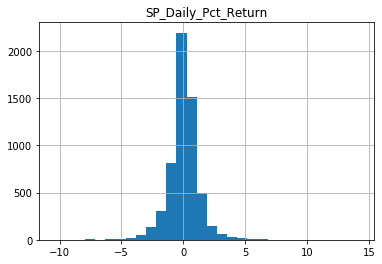

In [119]:
# sp500_raw_df.shape
sp500_raw_df.hist(column='SP_Daily_Pct_Return', bins=30)

In [120]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.2)

-0.7

In [121]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.4)

-0.1

In [122]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.5)

0.06

In [123]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.6)

0.24

In [124]:
sp500_raw_df.SP_Daily_Pct_Return.quantile(0.8)

0.76

In [125]:
commod_all_df.to_csv("commod_all_extr.csv")

In [126]:
commod_all_df.head()

,Date,SP_Daily_Pct_Return,Settle_x,SP_MA_55,SP_MA_5,SP_MA_20,Gold_Dly_Pct_Return,Settle_x,gold_MA_55,gold_MA_5,...,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,Settle,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1997-09-09,0.05,944.00,NaN,NaN,NaN,-0.15,324.1,-0.080727,-0.106,...,1.89,-0.235273,1.224,-0.0245,-0.30,72.90,0.67,0.143636,-0.552,0.2390
1,1997-09-10,-2.01,925.00,NaN,NaN,NaN,0.00,324.1,-0.089818,-0.056,...,-0.49,-0.266182,0.746,-0.1870,0.00,72.90,1.13,0.180727,-0.290,0.0585
2,1997-09-11,-0.73,918.25,NaN,NaN,NaN,0.77,326.6,-0.067273,0.142,...,1.69,-0.224545,0.806,-0.3395,-0.27,72.70,1.77,0.198000,0.212,0.1235
3,1997-09-12,1.69,933.75,NaN,NaN,NaN,-0.12,326.2,-0.066727,0.050,...,0.07,-0.192182,0.358,-0.2945,1.66,73.91,-3.03,0.177818,0.014,-0.0560
4,1997-09-15,-0.24,931.50,NaN,-0.248,NaN,-0.46,324.7,-0.079455,0.008,...,1.73,-0.124545,0.978,-0.3325,-0.65,73.43,0.57,0.210727,0.222,0.0750


In [127]:
commod_all_df.drop(['SP_Daily_Pct_Return', 'Settle_x', 'SP_MA_55','SP_MA_5','SP_MA_20','Settle_x','Settle_y','Settle_y','Settle',], axis=1, inplace=True)
commod_all_df.head()

,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,lnh_MA_20,SoyB_Dly_Pct_Return,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20
0,1997-09-09,-0.15,-0.080727,-0.106,-0.0945,-0.10,-0.346364,0.058,-0.4135,0.002979,...,-0.4100,1.89,-0.235273,1.224,-0.0245,-0.30,0.67,0.143636,-0.552,0.2390
1,1997-09-10,0.00,-0.089818,-0.056,-0.0705,0.31,-0.342182,-0.182,-0.3815,0.002988,...,-0.4075,-0.49,-0.266182,0.746,-0.1870,0.00,1.13,0.180727,-0.290,0.0585
2,1997-09-11,0.77,-0.067273,0.142,-0.0320,-2.84,-0.300727,-0.720,-0.5380,0.002881,...,-0.3510,1.69,-0.224545,0.806,-0.3395,-0.27,1.77,0.198000,0.212,0.1235
3,1997-09-12,-0.12,-0.066727,0.050,0.0030,0.32,-0.247091,-0.758,-0.4580,0.002894,...,-0.4000,0.07,-0.192182,0.358,-0.2945,1.66,-3.03,0.177818,0.014,-0.0560
4,1997-09-15,-0.46,-0.079455,0.008,-0.0430,0.21,-0.289091,-0.420,-0.2645,0.002913,...,-0.0430,1.73,-0.124545,0.978,-0.3325,-0.65,0.57,0.210727,0.222,0.0750


In [128]:
all_ret_df = pd.merge(commod_all_df, vix_df, on=["Date"])
# commod_all_df.drop(['Vix'], axis=1, inplace=True)
all_ret_df.head()

,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,soyb_MA_55,soyb_MA_5,soyb_MA_20,Cotton_Dly_Pct_Return,corn_Dly_Pct_Return,corn_MA_55,corn_MA_5,corn_MA_20,Vix Daily Chg.,VIX
0,1997-09-09,-0.15,-0.080727,-0.106,-0.0945,-0.10,-0.346364,0.058,-0.4135,0.002979,...,-0.235273,1.224,-0.0245,-0.30,0.67,0.143636,-0.552,0.2390,-2.09,23.89
1,1997-09-10,0.00,-0.089818,-0.056,-0.0705,0.31,-0.342182,-0.182,-0.3815,0.002988,...,-0.266182,0.746,-0.1870,0.00,1.13,0.180727,-0.290,0.0585,3.14,24.64
2,1997-09-11,0.77,-0.067273,0.142,-0.0320,-2.84,-0.300727,-0.720,-0.5380,0.002881,...,-0.224545,0.806,-0.3395,-0.27,1.77,0.198000,0.212,0.1235,5.48,25.99
3,1997-09-12,-0.12,-0.066727,0.050,0.0030,0.32,-0.247091,-0.758,-0.4580,0.002894,...,-0.192182,0.358,-0.2945,1.66,-3.03,0.177818,0.014,-0.0560,-3.16,25.17
4,1997-09-15,-0.46,-0.079455,0.008,-0.0430,0.21,-0.289091,-0.420,-0.2645,0.002913,...,-0.124545,0.978,-0.3325,-0.65,0.57,0.210727,0.222,0.0750,2.26,25.74


In [129]:
all_ret_df = pd.merge(all_ret_df, model_ret_df_coded, on=["Date"])
all_ret_df.head()

,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,SPCopp_sigcode,SPCgrsignal55_sigcode,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code
0,1998-04-30,-1.18,0.049636,-0.354,0.1385,-0.95,0.157091,-0.314,0.4240,0.002684,...,0,0,-7.02,21.18,0,0,1,1,1,4
1,1998-05-01,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,0.002781,...,0,0,-8.69,19.34,0,0,0,0,1,3
2,1998-05-04,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,0.002762,...,0,0,5.07,20.32,0,0,1,0,1,2
3,1998-05-05,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,0.002743,...,0,0,5.61,21.46,0,0,1,1,1,1
4,1998-05-06,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,0.002691,...,2,0,6.20,22.79,0,0,1,1,1,1


In [130]:
all_ret_df.to_csv("all_return.csv")


In [131]:
all_ret_df = pd.merge(all_ret_df, vix_df, on=["Date"])

In [132]:
all_ret_df.head()

,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
0,1998-04-30,-1.18,0.049636,-0.354,0.1385,-0.95,0.157091,-0.314,0.4240,0.002684,...,-7.02,21.18,0,0,1,1,1,4,-7.02,21.18
1,1998-05-01,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,0.002781,...,-8.69,19.34,0,0,0,0,1,3,-8.69,19.34
2,1998-05-04,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,0.002762,...,5.07,20.32,0,0,1,0,1,2,5.07,20.32
3,1998-05-05,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,0.002743,...,5.61,21.46,0,0,1,1,1,1,5.61,21.46
4,1998-05-06,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,0.002691,...,6.20,22.79,0,0,1,1,1,1,6.20,22.79


In [133]:
all_ret_train_df = all_ret_df.loc[(all_ret_df["Date"] >= "1998-05-01") & 
                                   (all_ret_df["Date"] <= "2016-05-02")]

In [134]:
all_ret_test_df = all_ret_df.loc[(all_ret_df["Date"] >= "2016-05-03") & 
                                   (all_ret_df["Date"] <= "2020-07-13")]

In [135]:
all_ret_test_df.to_csv("all_return_test.csv")

In [136]:
all_ret_train_df.to_csv("all_return_train.csv")

In [137]:
all_ret_train_df.head()

,Date,Gold_Dly_Pct_Return,gold_MA_55,gold_MA_5,gold_MA_20,Copper_Dly_Pct_Return,copper_MA_55,copper_MA_5,copper_MA_20,CopperGoldRatio,...,Vix Daily Chg._y,VIX_y,SPCrudesignal55_sigcode,SPLNHsignal55_sigcode,SPSoyBsignal55_sigcode,SPCtnsignal55_sigcode,SPcornsignal55_sigcode,SP_ret_code,Vix Daily Chg.,VIX
1,1998-05-01,-1.42,0.026909,-0.536,0.0295,2.16,0.191636,0.366,0.4995,0.002781,...,-8.69,19.34,0,0,0,0,1,3,-8.69,19.34
2,1998-05-04,0.59,0.046000,-0.228,-0.0415,-0.12,0.194182,0.030,0.5485,0.002762,...,5.07,20.32,0,0,1,0,1,2,5.07,20.32
3,1998-05-05,-0.26,0.034000,-0.164,-0.0720,-0.94,0.200727,-0.182,0.4785,0.002743,...,5.61,21.46,0,0,1,1,1,1,5.61,21.46
4,1998-05-06,-0.98,0.028909,-0.650,-0.1305,-2.85,0.163273,-0.540,0.2710,0.002691,...,6.20,22.79,0,0,1,1,1,1,6.20,22.79
5,1998-05-07,-0.69,0.018727,-0.552,-0.1505,-3.00,0.130364,-0.950,0.0855,0.002628,...,2.63,23.39,0,0,1,1,1,4,2.63,23.39
